# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

***

You have already solved the first exercise, so you can start from there (you've done taken advantage of the Elbow Method).

Plot the data with 2, 3 and 5 clusters. What do you think that means?

Finally, import the CSV with the correct answers (iris_with_answers.csv) and check if the clustering worked as expected. Note that this is not how we usually go about clustering problems. If we have the answers prior to that, we would go for classification (e.g. a logistic regression).

## Import the relevant libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [22]:
# Load the data
data = pd.read_csv('iris-dataset.csv')
# Check the data
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

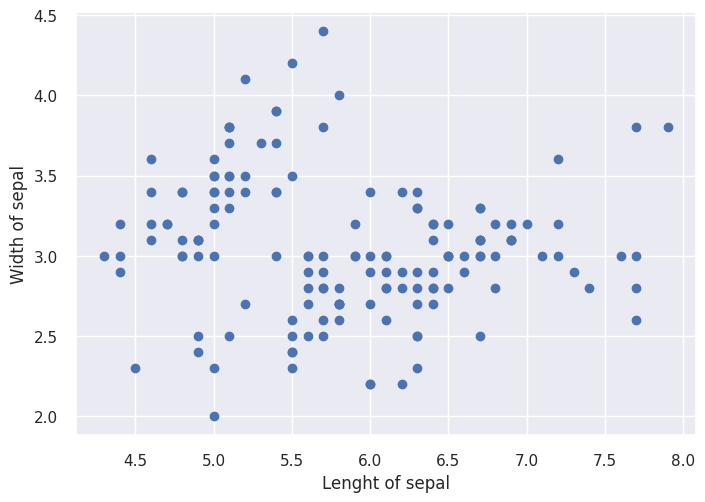

In [23]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(data['sepal_length'],data['sepal_width'])
# name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## Standardize the variables

Import and use the <i> scale </i> method from sklearn to standardize the data. 

In [24]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(data)
x_scaled.shape

(150, 4)

## Take Advantage of the Elbow Method

### WCSS

In [25]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num+1):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0000000000001,
 223.73200573676348,
 140.96581663074699,
 114.57790500611004,
 91.13730688271082,
 81.75658187204955,
 70.92668674516739,
 63.88466844575591,
 54.908856410495126,
 47.32071598850856]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

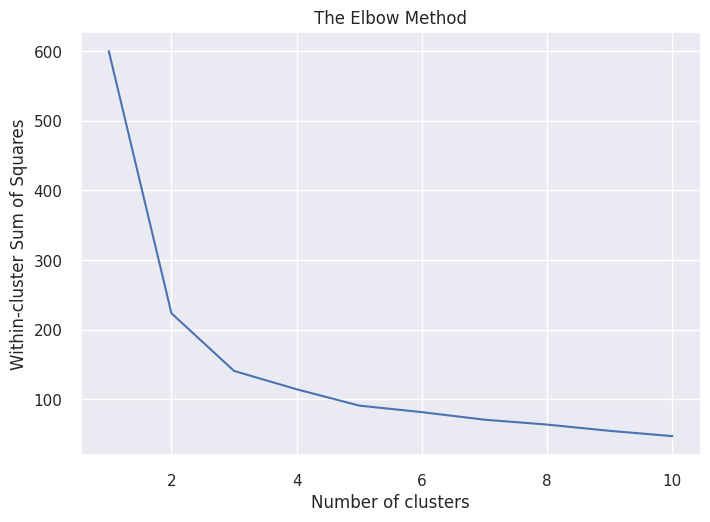

In [26]:
number_clusters = range(1,cl_num+1)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Understanding the Elbow Curve

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 5 clusters

In [27]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(n_clusters=5)

In [30]:
# Remember that we are plotting the non-standardized values of the sepal length and width. 
clusters_5 = pd.DataFrame(data=x_scaled, columns=data.columns.values)
clusters_5['cluster_pred']=kmeans_5.labels_

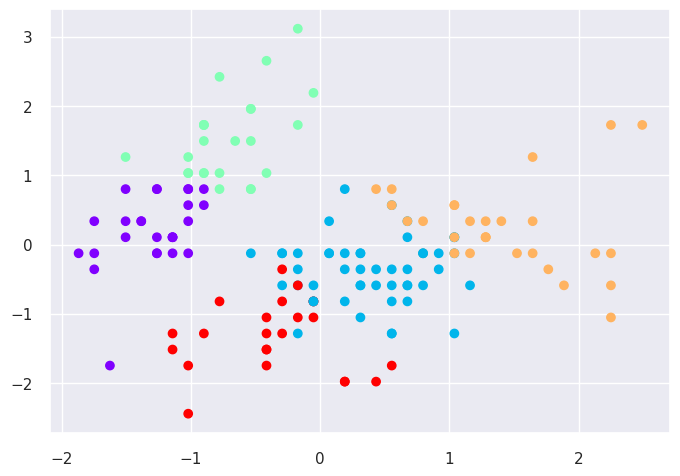

In [31]:
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow')

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
kmeans_x = KMeans(4)


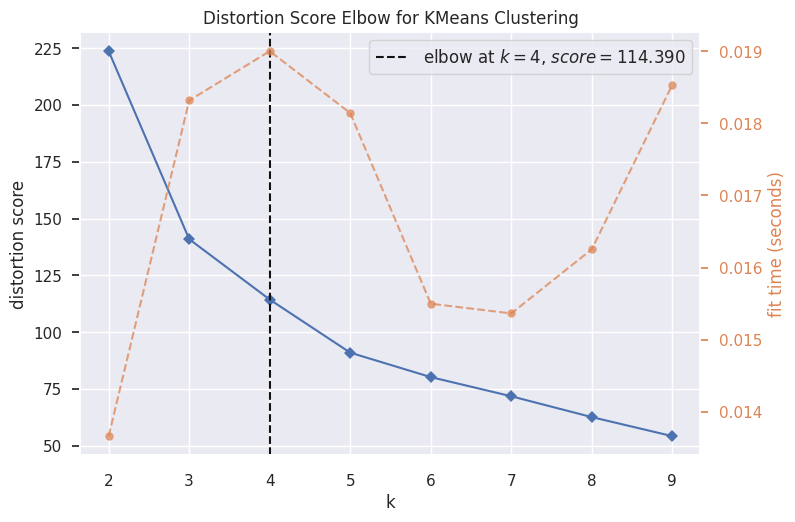

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10), metric='distortion')
 
visualizer.fit(x_scaled)        # Fit the data to the visualizer
# visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### The silhouette coefficient ranges from -1 to 1, with values closer to 1 indicating better cluster quality.

In [119]:
from sklearn.metrics import silhouette_score
for i in range(2, cl_num+1):
    km = KMeans(i, random_state=42)
    km.fit(x_scaled)
    labels = km.labels_
    # silhouette_coeff = silhouette_score(x_scaled, km.labels_, metric='euclidean', sample_size=50, random_state=42)
    silhouette_coeff = silhouette_score(x_scaled, km.labels_, metric='euclidean', random_state=42)
    print('number of clusters %d: %f' % (i, silhouette_coeff))

number of clusters 2: 0.580184
number of clusters 3: 0.458972
number of clusters 4: 0.386860
number of clusters 5: 0.345276
number of clusters 6: 0.329044
number of clusters 7: 0.330984
number of clusters 8: 0.343299
number of clusters 9: 0.348422
number of clusters 10: 0.344498


In [110]:
for i in range(2, cl_num+1):
    q, mod = divmod(i+1,3)
    print (q-1, mod)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


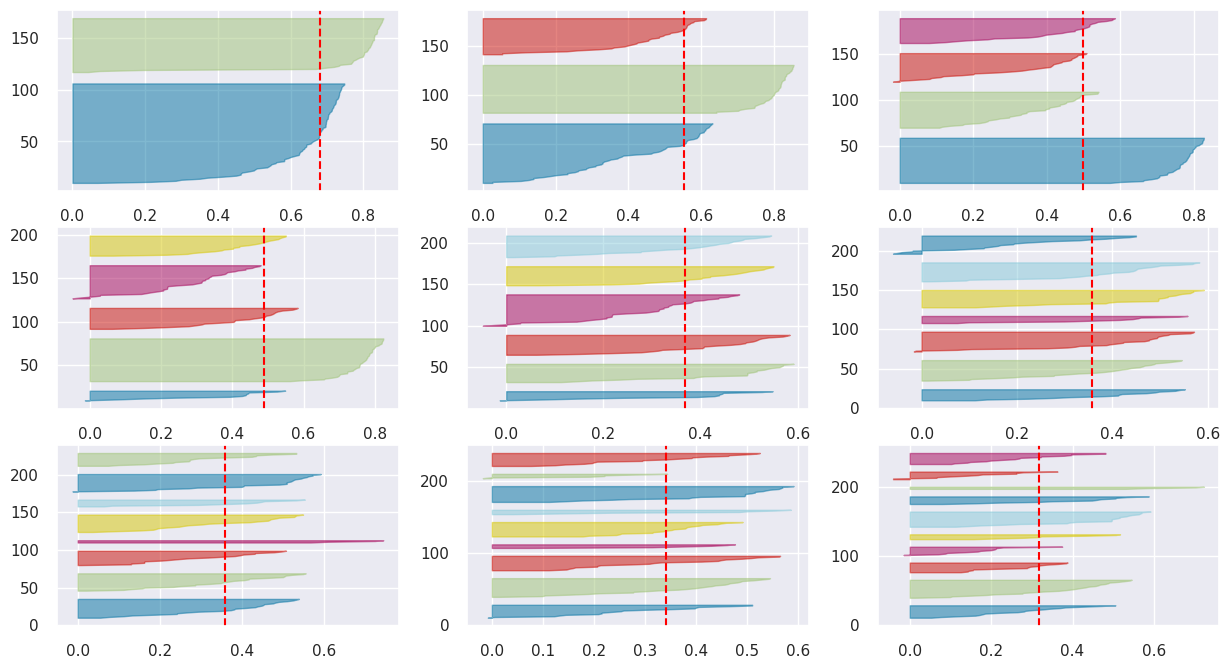

In [133]:
fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in range(2, cl_num+1):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    q, mod = divmod(i+1, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data) 

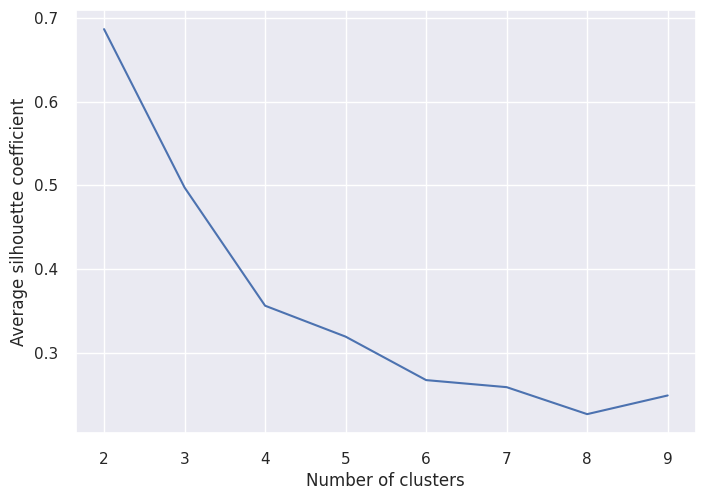

In [121]:
k_range = range(2, 10)

# For each value of k, run k-means clustering and calculate the average silhouette coefficient
silhouette_coefficients = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(x_scaled)
    silhouette_coefficients.append(silhouette_score(data, clusters))

# Plot the average silhouette coefficient as a function of k
plt.plot(k_range, silhouette_coefficients)
plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette coefficient")
plt.show()

SilhouetteVisualizer(ax=<AxesSubplot: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=2))

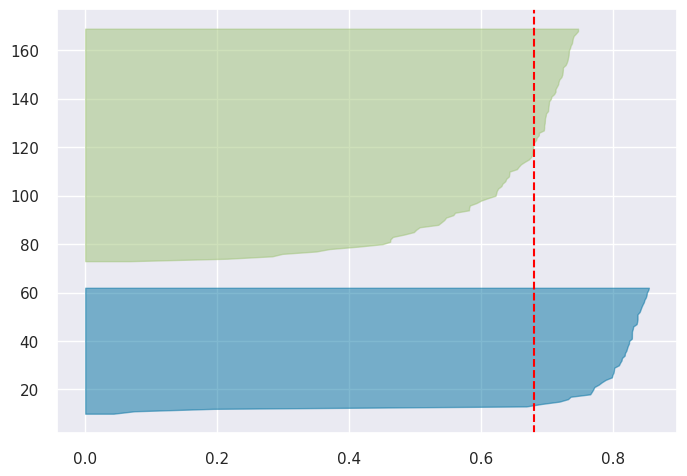

In [132]:
kmeans_x = KMeans(2)
visualizer = SilhouetteVisualizer(kmeans_x, metric='euclidean', colors='yellowbrick')
visualizer.fit(data) 
